# Results for GDF+PCA+MLP 

We use grid search for parameters:

* units = [1, 2, 4, 8, 16]
* hidden_layers = [0, 1, 2]
* kernel_regularizations = [0.0, 0.001, 0.0001, 0.01]


In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import numpy as np
from keras.models import model_from_json

import os
from collections import OrderedDict

from lob_data_utils import lob, db_result, gdf_pca, model
from lob_data_utils.svm_calculation import lob_svm


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

/home/vevurka/.conda/envs/py365/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data_dir = 'res_gdf_pca_mlp/'
data_dir_que_log = '../queue_imbalance/res_que_log'
if_should_savefig = False

In [3]:
df_log = pd.DataFrame()
for f in os.listdir(data_dir_que_log):
    if 'csv' not in f:
        continue
    d = pd.read_csv(os.path.join(data_dir_que_log, f))
    df_log = df_log.append(d)

In [4]:
df_res = pd.DataFrame()
for f in os.listdir(data_dir):
    if 'csv' not in f:
        continue
    stock = f.split('_')[4]
    r = f.split('_')[6][1:]
    s = f.split('_')[7][1:-4]
    l = pd.read_csv(os.path.join(data_dir, f))
    l['stock'] = np.zeros(len(l)) + int(stock)
    l['r'] = np.zeros(len(l)) + float(r)
    l['s'] = np.zeros(len(l)) + float(s)
    l['filename'] = [f for i in range(len(l))]
    df_res = df_res.append(l)
    
df_res['diff'] = df_res['train_matthews'] - df_res['matthews']

columns = ['matthews', 'test_matthews', 'stock', 'unit']
df_best = df_res.sort_values(by='matthews', ascending=False).groupby(['stock']).head(1)
df_best = pd.merge(df_best, df_log, on='stock', suffixes=['_mlp', '_log'])
df_best.index = df_best['stock'].astype(int)

In [5]:
df_best[['r', 's', 'train_matthews_mlp',
         'matthews_mlp', 'test_matthews_mlp', 'test_matthews_log']]

,r,s,train_matthews_mlp,matthews_mlp,test_matthews_mlp,test_matthews_log
stock,,,,,,
2748,0.01,0.5,0.229694,0.184032,0.128642,0.134365
4851,0.10,0.1,0.157743,0.156699,0.155482,0.138621
3879,0.01,0.1,0.146587,0.152797,0.127848,0.120715
10470,0.01,0.1,0.134240,0.152482,0.136708,0.127305
9761,0.01,0.1,0.126151,0.151418,0.113704,0.107395
2730,0.10,0.5,0.142795,0.145219,0.160746,0.150063
4320,0.10,0.1,0.155318,0.140203,0.123394,0.133488
1431,0.10,0.1,0.126817,0.136875,0.126157,0.123369
4799,0.10,0.1,0.109127,0.128728,0.121830,0.124104


In [6]:
df_best[['r', 's', 'train_roc_auc_mlp', 'roc_auc_mlp', 'test_roc_auc_mlp', 'test_roc_auc_log']]

,r,s,train_roc_auc_mlp,roc_auc_mlp,test_roc_auc_mlp,test_roc_auc_log
stock,,,,,,
2748,0.01,0.5,0.653989,0.612903,0.582737,0.596648
4851,0.10,0.1,0.609333,0.611963,0.612465,0.600698
3879,0.01,0.1,0.581031,0.584990,0.569844,0.565942
10470,0.01,0.1,0.577169,0.586766,0.576753,0.571647
9761,0.01,0.1,0.568433,0.580125,0.561421,0.558399
2730,0.10,0.5,0.584035,0.584783,0.592087,0.586418
4320,0.10,0.1,0.583701,0.576252,0.566327,0.572275
1431,0.10,0.1,0.570973,0.574005,0.569161,0.567813
4799,0.10,0.1,0.561228,0.572741,0.568859,0.569974


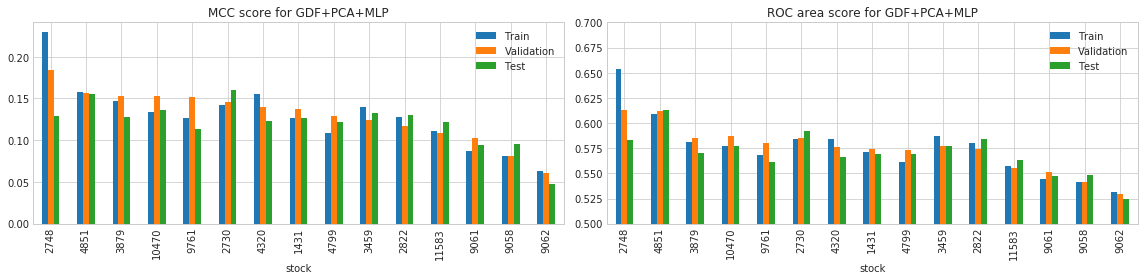

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
df_best[['train_matthews_mlp', 'matthews_mlp', 'test_matthews_mlp']].plot(kind='bar', ax=ax1)
ax1.legend(['Train', 'Validation', 'Test'])
ax1.set_title('MCC score for GDF+PCA+MLP')

df_best[['train_roc_auc_mlp', 'roc_auc_mlp', 'test_roc_auc_mlp']].plot(kind='bar', ax=ax2)
ax2.legend(['Train', 'Validation', 'Test'])
ax2.set_ylim(0.5, 0.7)
ax2.set_title('ROC area score for GDF+PCA+MLP')
plt.tight_layout()
if if_should_savefig:
    plt.savefig('gdf_pca_mlp_mcc_roc_scores_bar.png')

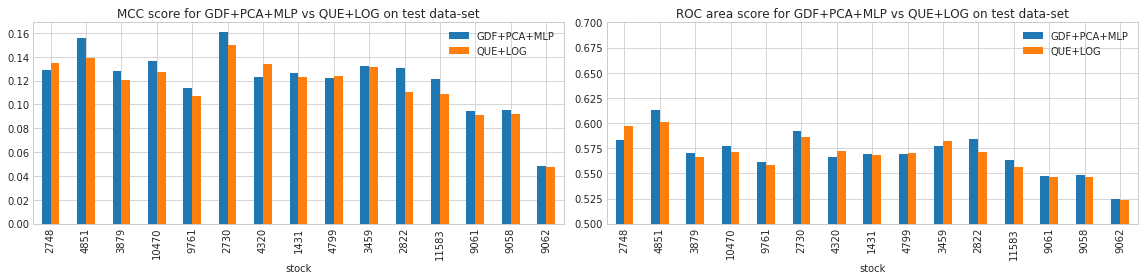

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
df_best[['test_matthews_mlp', 'test_matthews_log']].plot(kind='bar', ax=ax1)
ax1.legend(['GDF+PCA+MLP', 'QUE+LOG'])
ax1.set_title('MCC score for GDF+PCA+MLP vs QUE+LOG on test data-set')

df_best[['test_roc_auc_mlp', 'test_roc_auc_log']].plot(kind='bar', ax=ax2)
ax2.legend(['GDF+PCA+MLP', 'QUE+LOG'])
ax2.set_ylim(0.5, 0.7)
ax2.set_title('ROC area score for GDF+PCA+MLP vs QUE+LOG on test data-set')
plt.tight_layout()
if if_should_savefig:
    plt.savefig('gdf_pca_mlp_que_log_mcc_roc_scores_bar.png')

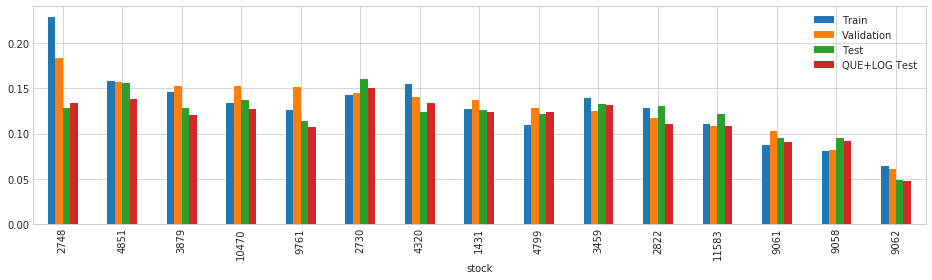

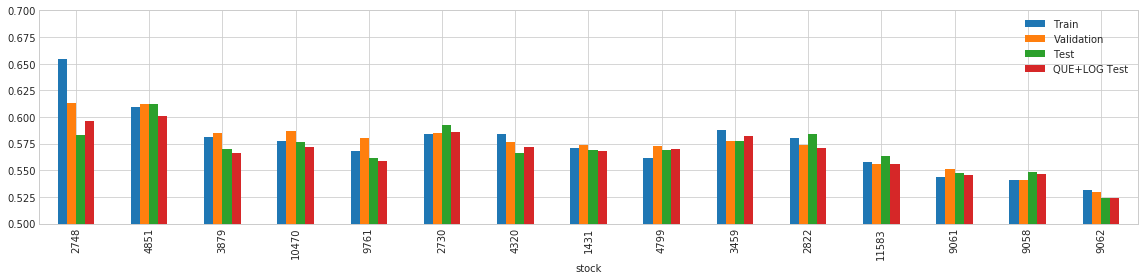

In [9]:
df_best[['train_matthews_mlp', 'matthews_mlp', 'test_matthews_mlp', 'test_matthews_log']].plot(kind='bar', figsize=(16, 4))
plt.legend(['Train', 'Validation', 'Test', 'QUE+LOG Test'])

df_best[['train_roc_auc_mlp', 'roc_auc_mlp', 'test_roc_auc_mlp', 'test_roc_auc_log']].plot(kind='bar', figsize=(16, 4))
plt.legend(['Train', 'Validation', 'Test', 'QUE+LOG Test'])
plt.ylim(0.5, 0.7)
plt.tight_layout()

In [10]:
df_best[['train_matthews_mlp', 'matthews_mlp', 'test_matthews_mlp', 
         'train_roc_auc_mlp', 'roc_auc_mlp', 'test_roc_auc_mlp']]

,train_matthews_mlp,matthews_mlp,test_matthews_mlp,train_roc_auc_mlp,roc_auc_mlp,test_roc_auc_mlp
stock,,,,,,
2748,0.229694,0.184032,0.128642,0.653989,0.612903,0.582737
4851,0.157743,0.156699,0.155482,0.609333,0.611963,0.612465
3879,0.146587,0.152797,0.127848,0.581031,0.584990,0.569844
10470,0.134240,0.152482,0.136708,0.577169,0.586766,0.576753
9761,0.126151,0.151418,0.113704,0.568433,0.580125,0.561421
2730,0.142795,0.145219,0.160746,0.584035,0.584783,0.592087
4320,0.155318,0.140203,0.123394,0.583701,0.576252,0.566327
1431,0.126817,0.136875,0.126157,0.570973,0.574005,0.569161
4799,0.109127,0.128728,0.121830,0.561228,0.572741,0.568859


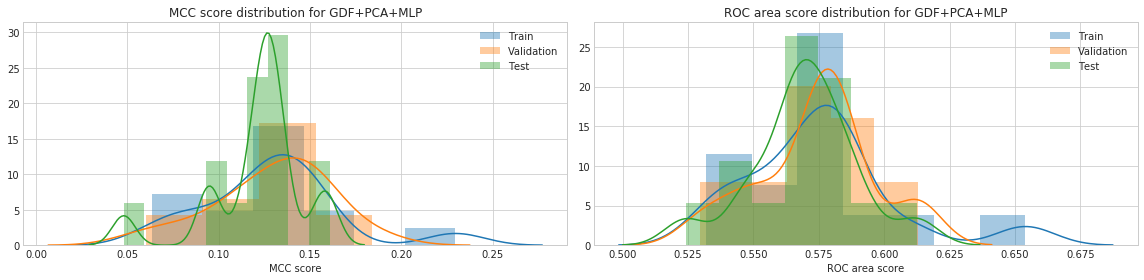

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(df_best['train_matthews_mlp'], label='Train', ax=ax1)
sns.distplot(df_best['matthews_mlp'], label='Validation', ax=ax1)
sns.distplot(df_best['test_matthews_mlp'], label='Test', ax=ax1)
ax1.legend(['Train', 'Validation', 'Test'])
ax1.set_title('MCC score distribution for GDF+PCA+MLP')
ax1.set_xlabel('MCC score')

sns.distplot(df_best['train_roc_auc_mlp'], label='Train', ax=ax2)
sns.distplot(df_best['roc_auc_mlp'], label='Validation', ax=ax2)
sns.distplot(df_best['test_roc_auc_mlp'], label='Test', ax=ax2)
ax2.legend(['Train', 'Validation', 'Test'])
ax2.set_title('ROC area score distribution for GDF+PCA+MLP')
ax2.set_xlabel('ROC area score')

plt.tight_layout()
if if_should_savefig:
    plt.savefig('gdf_pca_mlp_score_dist.png')

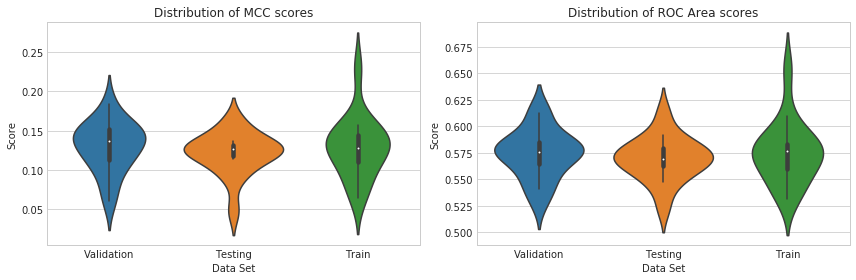

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

columns = ['stock', 'matthews_mlp', 'roc_auc_mlp', 
           'test_matthews_mlp', 'test_roc_auc_mlp', 'train_matthews_mlp', 'train_roc_auc_mlp']

df = df_best[columns].copy()
df.rename(columns={
    'matthews_mlp': 'Validation', 'test_matthews_mlp': 'Testing', 'train_matthews_mlp': 'Train'}, inplace=True)
df = df.melt(['stock', 'roc_auc_mlp', 'test_roc_auc_mlp', 'train_roc_auc_mlp'])
sns.violinplot(x="variable", y="value", data=df, ax=ax1)
ax1.set_title('Distribution of MCC scores')

ax1.set_xlabel('Data Set')
ax1.set_ylabel('Score')

df = df_best[columns].copy()
df.rename(columns={'roc_auc_mlp': 'Validation', 'test_roc_auc_mlp': 'Testing', 'train_roc_auc_mlp': 'Train'}, inplace=True)
df = df.melt(['stock', 'matthews_mlp', 'test_matthews_mlp', 'train_matthews_mlp'])

ax2.set_title('Distribution of ROC Area scores')

sns.violinplot(x="variable", y="value", data=df, ax=ax2)
ax2.set_xlabel('Data Set')
ax2.set_ylabel('Score')

plt.tight_layout()
if if_should_savefig:
    plt.savefig('violin_distribution_scores_gdf_pca_mlp.png')

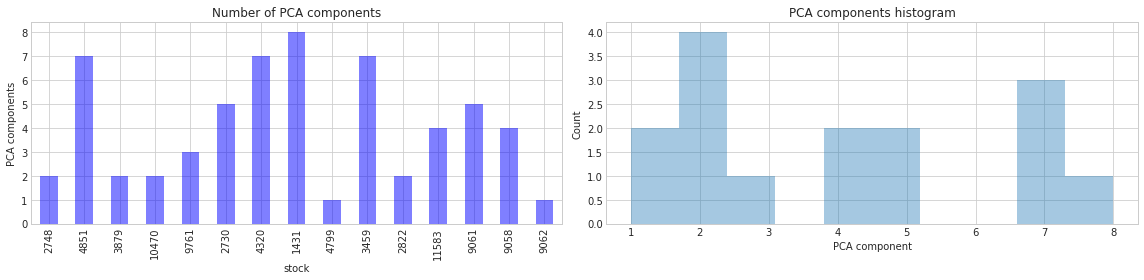

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
df_best['pca_components'].plot(kind='bar', color=['b'], alpha=0.5, ax=ax1)
ax1.set_title('Number of PCA components')
ax1.set_ylabel('PCA components')

sns.distplot(df_best['pca_components'], ax=ax2, bins=10, kde=False)
ax2.set_title('PCA components histogram')
ax2.set_ylabel('Count')
ax2.set_xlabel('PCA component')


plt.tight_layout()
if if_should_savefig:
    plt.savefig('gdf_pca_mlp_pca_components.png')

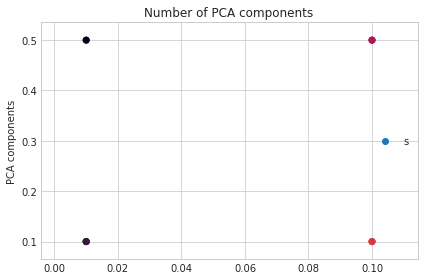

In [14]:
plt.scatter(x=df_best['r'], y=df_best['s'], c=df_best['pca_components'])
plt.title('Number of PCA components')
plt.ylabel('PCA components')
plt.legend()
plt.tight_layout()
if if_should_savefig:
    plt.savefig('gdf_pca_mlp_pca_components.png')

Text(0.5,1,'MCC score distribution for different r and s parameters for validation set')

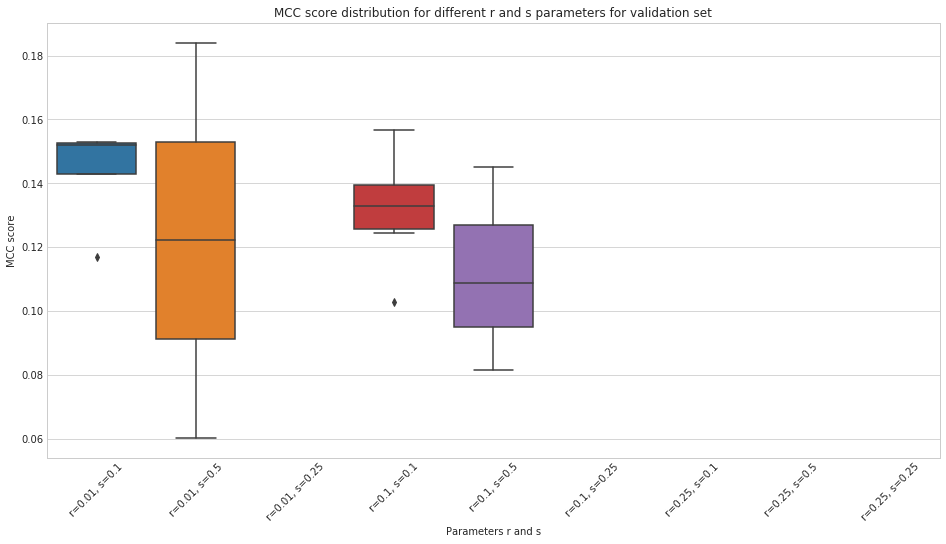

In [15]:
r_s_dict = OrderedDict()
r_parameters = [0.01, 0.1, 0.25]
s_parameters = [0.1, 0.5, 0.25]
for r in r_parameters:
    for s in s_parameters:
        r_s_dict['r={}, s={}'.format(r, s)] = df_best[df_best['r'] == r][df_best['s'] == s][
            'matthews_mlp'].values

plt.figure(figsize=(16, 8))
ax = sns.boxplot(data=list(r_s_dict.values()))
plt.ylabel('MCC score')
plt.xlabel('Parameters r and s')
_ = ax.set_xticklabels(list(r_s_dict.keys()), rotation=45)
plt.title('MCC score distribution for different r and s parameters for validation set')

## Comparision with QUE+LOG

In [16]:
df_best['diff_test_matthews'] = df_best['test_matthews_mlp'] - df_best['test_matthews_log']
df_best['diff_train_matthews'] = df_best['train_matthews_mlp'] - df_best['train_matthews_log']
df_best['diff_matthews'] = df_best['matthews_mlp'] - df_best['matthews_log']
df_best['diff_test_roc_auc'] = df_best['test_roc_auc_mlp'] - df_best['test_roc_auc_log']
df_best['diff_train_roc_auc'] = df_best['train_roc_auc_mlp'] - df_best['train_roc_auc_log']
df_best['diff_roc_auc'] = df_best['roc_auc_mlp'] - df_best['roc_auc_log']

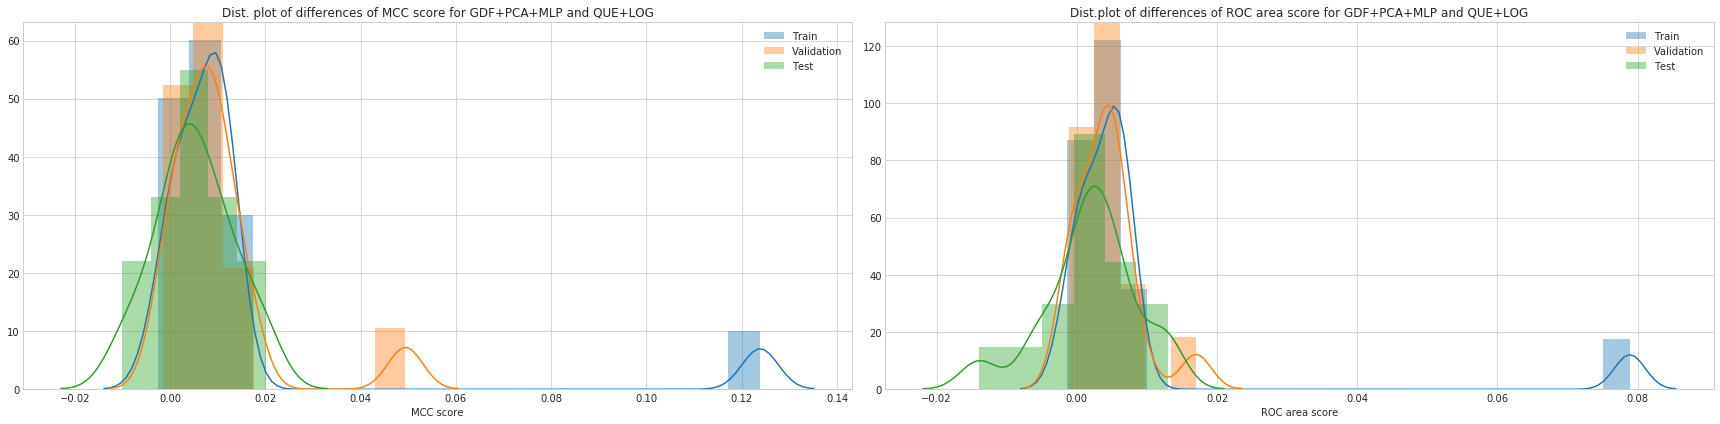

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))
sns.distplot(df_best['diff_train_matthews'], label='Train', ax=ax1)
sns.distplot(df_best['diff_matthews'], label='Validation', ax=ax1)
sns.distplot(df_best['diff_test_matthews'], label='Test', ax=ax1)
ax1.set_title('Dist. plot of differences of MCC score for GDF+PCA+MLP and QUE+LOG')
ax1.set_xlabel('MCC score')
ax1.legend(['Train', 'Validation', 'Test'])

sns.distplot(df_best['diff_train_roc_auc'], label='Train', ax=ax2)
sns.distplot(df_best['diff_roc_auc'], label='Validation', ax=ax2)
sns.distplot(df_best['diff_test_roc_auc'], label='Test', ax=ax2)
ax2.set_title('Dist.plot of differences of ROC area score for GDF+PCA+MLP and QUE+LOG')
ax2.legend(['Train', 'Validation', 'Test'])
ax2.set_xlabel('ROC area score')
plt.tight_layout()
if if_should_savefig:
    plt.savefig('gdf_pca_mlp_and_que_log_score_diff.png')

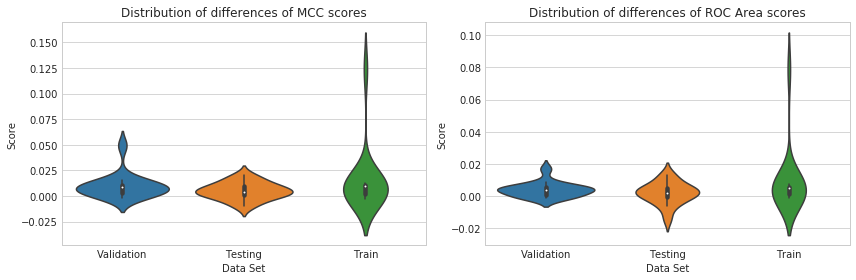

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

columns = ['stock', 'diff_matthews', 'diff_roc_auc', 
           'diff_test_matthews', 'diff_test_roc_auc', 'diff_train_matthews', 'diff_train_roc_auc']

df = df_best[columns].copy()
df.rename(columns={
    'diff_matthews': 'Validation', 'diff_test_matthews': 'Testing', 'diff_train_matthews': 'Train'}, inplace=True)
df = df.melt(['stock', 'diff_roc_auc', 'diff_test_roc_auc', 'diff_train_roc_auc'])
sns.violinplot(x="variable", y="value", data=df, ax=ax1)
ax1.set_title('Distribution of differences of MCC scores')

ax1.set_xlabel('Data Set')
ax1.set_ylabel('Score')

df = df_best[columns].copy()
df.rename(
    columns={'diff_roc_auc': 'Validation', 'diff_test_roc_auc': 'Testing', 'diff_train_roc_auc': 'Train'}, 
    inplace=True)
df = df.melt(['stock', 'diff_matthews', 'diff_test_matthews', 'diff_train_matthews'])

ax2.set_title('Distribution of differences of ROC Area scores')

sns.violinplot(x="variable", y="value", data=df, ax=ax2)
ax2.set_xlabel('Data Set')
ax2.set_ylabel('Score')

plt.tight_layout()
if if_should_savefig:
    plt.savefig('gdf_pca_mlp_and_que_log_violin_score_diff.png')

In [19]:
bad = df_best[df_best['test_matthews_mlp'] < df_best['test_matthews_log']]['stock'].values

In [20]:
df_best[['diff_train_matthews', 'diff_matthews', 'diff_test_matthews', 
        'diff_train_roc_auc', 'diff_roc_auc', 'diff_test_roc_auc']][df_best['stock'].isin(bad)]

,diff_train_matthews,diff_matthews,diff_test_matthews,diff_train_roc_auc,diff_roc_auc,diff_test_roc_auc
stock,,,,,,
2748,0.123855,0.049414,-0.005723,0.078904,0.017020,-0.013912
4320,0.012987,0.011162,-0.010094,0.006857,0.006253,-0.005948
4799,-0.002564,-0.001529,-0.002274,-0.001393,-0.001161,-0.001115


In [21]:
df_best[['diff_train_matthews', 'diff_matthews', 'diff_test_matthews', 
        'diff_train_roc_auc', 'diff_roc_auc', 'diff_test_roc_auc']][df_best['stock'].isin(bad)].describe()

,diff_train_matthews,diff_matthews,diff_test_matthews,diff_train_roc_auc,diff_roc_auc,diff_test_roc_auc
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.044760,0.019682,-0.006030,0.028123,0.007370,-0.006991
std,0.068939,0.026519,0.003919,0.044171,0.009142,0.006462
min,-0.002564,-0.001529,-0.010094,-0.001393,-0.001161,-0.013912
25%,0.005212,0.004817,-0.007909,0.002732,0.002546,-0.009930
50%,0.012987,0.011162,-0.005723,0.006857,0.006253,-0.005948
75%,0.068421,0.030288,-0.003999,0.042881,0.011636,-0.003531
max,0.123855,0.049414,-0.002274,0.078904,0.017020,-0.001115


In [22]:
df_best[['diff_train_matthews', 'diff_matthews', 'diff_test_matthews', 
        'diff_train_roc_auc', 'diff_roc_auc', 'diff_test_roc_auc']].describe()

,diff_train_matthews,diff_matthews,diff_test_matthews,diff_train_roc_auc,diff_roc_auc,diff_test_roc_auc
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.014402,0.009936,0.005138,0.008744,0.004213,0.001908
std,0.030645,0.012069,0.008174,0.019610,0.004572,0.006767
min,-0.002564,-0.001529,-0.010094,-0.001393,-0.001161,-0.013912
25%,0.002430,0.002920,0.000720,0.001229,0.000700,-0.000475
50%,0.009492,0.008320,0.003740,0.005325,0.003883,0.001890
75%,0.010666,0.010964,0.010042,0.006031,0.005454,0.005388
max,0.123855,0.049414,0.020201,0.078904,0.017020,0.012985


In [23]:
print(df_best[df_best['test_roc_auc_mlp'] < df_best['test_roc_auc_log']]['stock'].values)

[2748. 4320. 4799. 3459.]


In [24]:
print(df_best[df_best['test_matthews_mlp'] < df_best['test_matthews_log']]['stock'].values)

[2748. 4320. 4799.]


In [25]:
df_best[['r', 's', 'matthews_mlp', 'test_matthews_mlp', 'test_matthews_log', 'stock', 'filename']]

,r,s,matthews_mlp,test_matthews_mlp,test_matthews_log,stock,filename
stock,,,,,,,
2748,0.01,0.5,0.184032,0.128642,0.134365,2748.0,mlp_pca_n_gdf_2748_len24000_r0.01_s0.5.csv_par...
4851,0.10,0.1,0.156699,0.155482,0.138621,4851.0,mlp_pca_n_gdf_4851_len24000_r0.1_s0.1.csv_partial
3879,0.01,0.1,0.152797,0.127848,0.120715,3879.0,mlp_pca_n_gdf_3879_len24000_r0.01_s0.1.csv_par...
10470,0.01,0.1,0.152482,0.136708,0.127305,10470.0,mlp_pca_gdf_n_10470_len24000_r0.01_s0.1.csv
9761,0.01,0.1,0.151418,0.113704,0.107395,9761.0,mlp_pca_n_gdf_9761_len24000_r0.01_s0.1.csv_par...
2730,0.10,0.5,0.145219,0.160746,0.150063,2730.0,mlp_pca_n_gdf_2730_len24000_r0.1_s0.5.csv_partial
4320,0.10,0.1,0.140203,0.123394,0.133488,4320.0,mlp_pca_n_gdf_4320_len24000_r0.1_s0.1.csv_partial
1431,0.10,0.1,0.136875,0.126157,0.123369,1431.0,mlp_pca_gdf_n_1431_len24000_r0.1_s0.1.csv
4799,0.10,0.1,0.128728,0.121830,0.124104,4799.0,mlp_pca_gdf_n_4799_len24000_r0.1_s0.1.csv


In [26]:
columns = ['stock'] + [c for c in df_best.columns if 'matthews' in c]
df_best[columns + ['arch']]

for i, row in df_best.iterrows():
    
    m = model_from_json(row['arch'])

    from keras.utils import plot_model
    st = row['stock']
    r = row['r']
    s = row['s']
    if if_should_savefig:
        plot_model(m, show_layer_names=True, show_shapes=True, 
                   to_file=f'plot_model_mlp/model_{st}_r{r}_s{s}.png')